# Artificial Neural Networks

## Loading important libraries and datasets

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [47]:
data = pd.read_csv('datasets_13214_17927_Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preparing data for training

In [48]:
X = data.drop(['RowNumber','CustomerId','Surname','Exited'],axis = 1)
y = data['Exited']

## Preparing dummies for categorical varibles

In [49]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [50]:
X = pd.concat([X,geography,gender],axis=1)

In [51]:
X = X.drop(['Geography','Gender'],axis = 1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

## Standardizing the data

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating an empty neural network

In [108]:
classifier = Sequential() #empty neural network

## Adding hidden layers

In [109]:
classifier.add(Dense(units = 6,kernel_initializer = 'he_normal',activation = 'relu',input_dim= 11)) #hidden layer 1

In [110]:
classifier.add(Dense(units = 6,kernel_initializer = 'he_normal',activation = 'relu')) #hidden layer 2

In [111]:
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid')) #hidden layer 3

## Compiling the hidden layer

In [112]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the hidden layer

In [113]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size= 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6592 - accuracy: 0.6708 - val_loss: 0.5211 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.8011 - val_loss: 0.4456 - val_accuracy: 0.8065
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4247 - accuracy: 0.8134 - val_loss: 0.4240 - val_accuracy: 0.8152
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.8224 - val_loss: 0.4071 - val_accuracy: 0.8190
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8317 - val_loss: 0.3935 - val_accuracy: 0.8304
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3724 - accuracy: 0.8414 - val_loss: 0.3823 - val_accuracy: 0.8368
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8461 - val_loss: 0.3770 - val_accuracy: 0.8383

In [114]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plotting Model Performance

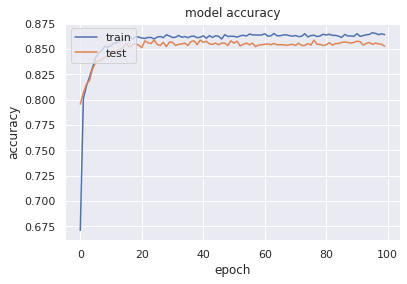

In [115]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

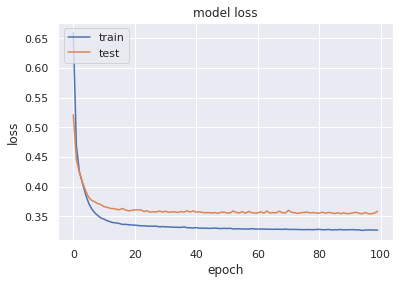

In [116]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

## Testing model accuracy

In [117]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [118]:
cm = confusion_matrix(y_test, y_pred)

In [119]:
score = accuracy_score(y_pred,y_test)

In [120]:
cm

array([[1494,  101],
       [ 176,  229]])

In [121]:
score

0.8615